In [ ]:
pip install xmltodict

두 자료에서 공통으로 조사된 국가 찾은후 공통국가의 정보를 병합

In [ ]:
import requests
import xml.etree.ElementTree as ET
import json
import xmltodict
import pandas as pd


# API 키를 설정합니다. 실제 키를 사용하려면 해당 API의 가입 및 키 발급 절차를 따라야 합니다.
api_key = 'WZUhN681Zo+oIY4DxPGg3aQuu1cATWDMu1IoCskFas1g1PfffBtSdAyv0gS4Ip9pM1e0PlYIpuqAMKt2I32crA=='



# 1번째
url = 'http://apis.data.go.kr/1262000/OverviewEconomicService/OverviewEconomicList'

# API 요청에 필요한 파라미터를 설정합니다. 실제로는 API 문서를 참고하여 적절한 파라미터를 설정해야 합니다.
params = {
    'ServiceKey': api_key,
    'numOfRows' : '1000',
    'pageNo' : '1'
    # 기타 필요한 파라미터들을 추가합니다.
}

try:
    # API에 GET 요청을 보냅니다.
    response = requests.get(url, params=params)


    # API 응답을 JSON 형식으로 파싱합니다.
    data1 = response.json()

    # 여기서부터는 데이터를 원하는 형태로 가공하면 됩니다.
    # 예시: 데이터 출력


    countries1 = set(item['country_nm'] for item in data1['data'])

    print( countries1)


except requests.exceptions.RequestException as e:
    print(f'API 요청 중 오류 발생: {e}')




#두번째
url = 'http://apis.data.go.kr/B490007/worldjob16/openApi16'
params = {
    'serviceKey': api_key,
    'pageNo': '1',
    'numOfRows': '1000',
    'searchYear': '2022'
}

try:
    # API에 GET 요청을 보냅니다.
    response = requests.get(url, params=params)
    response.raise_for_status()  # 오류가 발생하면 예외를 일으킵니다.

    # XML을 JSON으로 변환
    root = ET.fromstring(response.content)
    xml_data = ET.tostring(root, encoding='utf-8').decode('utf-8')
    json_data = json.loads(json.dumps(xmltodict.parse(xml_data), ensure_ascii=False))



    # JSON 데이터 출력
    data = json_data.get('WORLDJOB', {}).get('BODY', {})

    # 'prcerEpmtNationNm'의 값들 추출하여 출력

    countries2 = set(item['prcerEpmtNationNm'] for item in data['ITEM'])
    print(countries2)


except requests.exceptions.RequestException as e:
    print(f'API 요청 중 오류 발생: {e}')




common_countries = countries1.intersection(countries2)

print(common_countries)
print(f'공통된 국가 수:{len(common_countries)}')

# 각 API로부터 공통된 국가에 대한 데이터 추출
data1_filtered = [item for item in data1['data'] if item['country_nm'] in common_countries]
data2_filtered = [item for item in data['ITEM'] if item['prcerEpmtNationNm'] in common_countries]


df1 = pd.DataFrame(data1_filtered)
df1.set_index('country_nm', inplace=True)

df2 = pd.DataFrame(data2_filtered)
df2.set_index('prcerEpmtNationNm', inplace=True)
# 필요한 작업 수행: 데이터 조작, 병합 등


# 두 데이터프레임을 세로로 합치기
merged_df = pd.concat([df2, df1], axis=1)



# CSV 파일로 저장
merged_df.to_csv('merged_df.csv', index=True)

# 1열의 값을 정수로 변환하고 내림차순으로 정렬
merged_df['cnt'] = merged_df['cnt'].astype(int)  # 텍스트를 정수로 변환
df_sorted_cnt = merged_df.sort_values(by=merged_df.columns[0], ascending=False)

# 결과 출력

df_sorted_cnt.to_csv('df_sorted_cnt.csv', index=True)

{'독일', '르완다', '슬로바키아', '에리트레아', '레소토', '쿠바', '일본', '남수단', '소말리아', '튀르키예공화국', '팔라우', '러시아', '폴란드', '파키스탄', '토고', '모로코', '이집트', '카타르', '바하마', '도미니카공화국', '기니비사우', '미얀마', '멕시코', '탄자니아', '덴마크', '코트디부아르', '마다가스카르', '벨리즈', '우크라이나', '핀란드', '콩고', '뉴질랜드', '레바논', '중국', '헝가리', '사이프러스', '남아프리카공화국', '인도', '잠비아', '크로아티아', '앤티가바부다', '타지키스탄', '라이베리아', '카보베르데', '몰도바', '부르키나파소', '세인트빈센트그레나딘', '코모로', '감비아', '바누아투', '베냉', '니제르', '리비아', '오스트리아', '가이아나', '이스라엘', '지부티', '파푸아뉴기니', '아르헨티나', '카자흐스탄', '인도네시아', '콜롬비아', '에스토니아', '캐나다', '팔레스타인', '영국', '우루과이', '네팔연방', '이탈리아', '중앙아프리카', '온두라스', '태국', '사우디아라비아', '마이크로네시아연방', '과테말라', '라오스', '도미니카연방', '에티오피아', '나이지리아', '카메룬', '필리핀', '벨기에', '스위스', '안도라', '투발루', '트리니다드토바고', '요르단', '솔로몬제도', '키리바시', '포르투갈', '호주', '콩고민주공화국', '우간다', '코스타리카', '쿠웨이트', '통가', '사모아', '알바니아', '파나마', '모나코', '가나', '아일랜드', '아제르바이잔', '조지아', '상투메프린시페', '노르웨이', '북마케도니아', '케냐', '이라크', '베네수엘라볼리바르', '보츠와나', '체코', '엘살바도르', '스페인', '알제리', '바베이도스', '모리타니아', '우즈베키스탄', '세인트루시아', '차드', '브라질', '몰디브', '부룬디', '아랍에미리트'

병합한 자료를 바탕으로 가설검증으 위한 데이터 추출

In [ ]:
# CSV 파일 불러오기
file_path = 'df_sorted_cnt.csv'
df = pd.read_csv(file_path)


# '이름' 열과 '도시' 열만을 선택하여 새로운 데이터프레임 만들기
new_df1 = df[['country_eng_nm','cnt', 'export_amount','import_amount']]
new_df2 = df[['country_eng_nm','cnt', 'gdp']]
new_df3 = df[['country_eng_nm','cnt', 'gdp_growth_rate']]
new_df4 = df[['country_eng_nm','cnt', 'gdp_per_capita']]

new_df5 = df[['country_eng_nm','cnt', 'inflation_rate']]
new_df6 = df[['country_eng_nm','cnt', 'unemployment_rate']]

new_df1.to_csv('new_df1.csv', index=True)
new_df2.to_csv('new_df2.csv', index=True)
new_df3.to_csv('new_df3.csv', index=True)
new_df4.to_csv('new_df4.csv', index=True)
new_df5.to_csv('new_df5.csv', index=True)
new_df6.to_csv('new_df6.csv', index=True)





In [ ]:
import pandas as pd

# Assuming you have dataframes new_df1, new_df2, ..., new_df6 already defined

for i in range(6):
    top_countries = globals()[f'new_df{i + 1}'].nlargest(5, 'cnt')
    bottom_countries = globals()[f'new_df{i + 1}'].nsmallest(5, 'cnt')

    # Extracted countries merged into a new dataframe
    merged_df = pd.concat([top_countries, bottom_countries])

    # Save the merged dataframe to a CSV file
    merged_df.to_csv(f'{i+1}_new_df1.csv', index=True)


해봤더니 1,3번과 5,6반은 5개씩 추출했을때 존재하지 않는 값이 있어 5개를 추출하여 비교 하기 위해 각자 따로따로 개수를 맞춰주었습니다

1번

In [ ]:
    i=0
    top_countries = globals()[f'new_df{i + 1}'].nlargest(6, 'cnt')
    bottom_countries = globals()[f'new_df{i + 1}'].nsmallest(5, 'cnt')

    # Extracted countries merged into a new dataframe
    merged_df = pd.concat([top_countries, bottom_countries])

    # Save the merged dataframe to a CSV file
    merged_df.to_csv(f'{i+1}_new_df1.csv', index=True)

3번

In [ ]:
    i=2
    top_countries = globals()[f'new_df{i + 1}'].nlargest(7, 'cnt')
    bottom_countries = globals()[f'new_df{i + 1}'].nsmallest(5, 'cnt')

    # Extracted countries merged into a new dataframe
    merged_df = pd.concat([top_countries, bottom_countries])

    # Save the merged dataframe to a CSV file
    merged_df.to_csv(f'{i+1}_new_df1.csv', index=True)

2,4번

In [ ]:
a=(1,3)

for i in a:
    top_countries = globals()[f'new_df{i + 1}'].nlargest(5, 'cnt')
    bottom_countries = globals()[f'new_df{i + 1}'].nsmallest(5, 'cnt')

    # Extracted countries merged into a new dataframe
    merged_df = pd.concat([top_countries, bottom_countries])

    # Save the merged dataframe to a CSV file
    merged_df.to_csv(f'{i+1}_new_df1.csv', index=True)

5,6번

In [ ]:
a=(4,5)

for i in a:
    top_countries = globals()[f'new_df{i + 1}'].nlargest(5, 'cnt')
    bottom_countries = globals()[f'new_df{i + 1}'].nsmallest(14, 'cnt')

    # Extracted countries merged into a new dataframe
    merged_df = pd.concat([top_countries, bottom_countries])

    # Save the merged dataframe to a CSV file
    merged_df.to_csv(f'{i+1}_new_df1.csv', index=True)

# 시각화

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

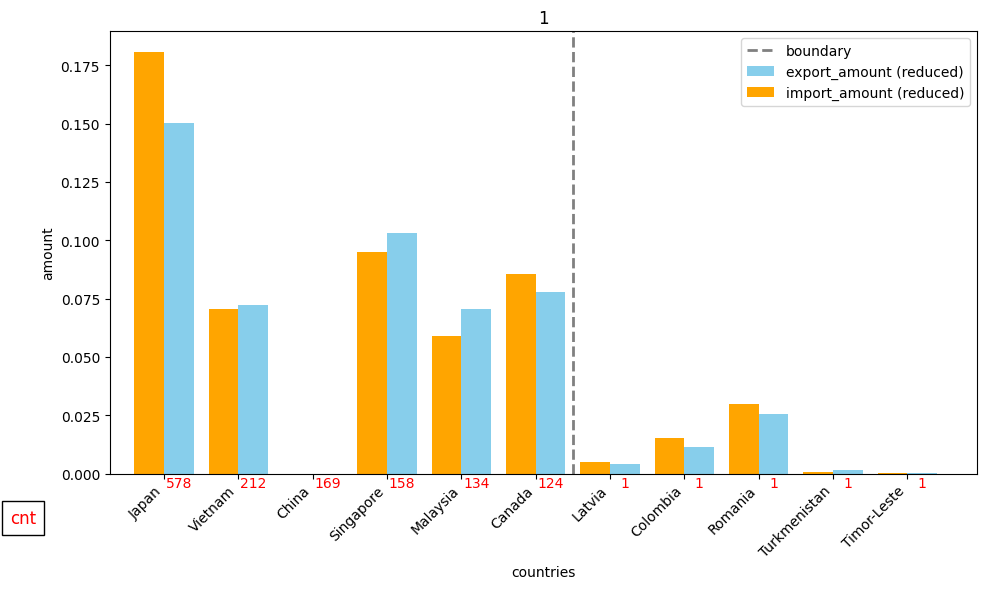

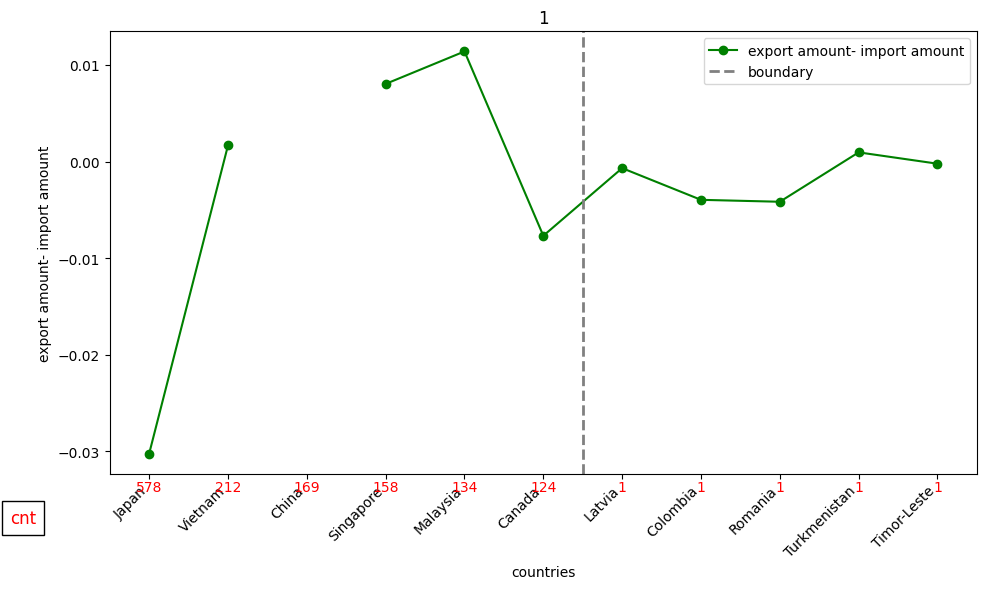

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 이미 로드하고 'reduced_values1', 'reduced_values2'를 정의했다고 가정합니다.
file_path = '1_new_df1.csv'
df = pd.read_csv(file_path)



reduced_values1 = df['export_amount'] / 5000000000000
reduced_values2 = df['import_amount'] / 5000000000000

# 첫 번째 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
bars1 = plt.bar(df['country_eng_nm'], reduced_values1, color='skyblue', width=0.4, label='export_amount (reduced)')

# 두 번째 막대 그래프 (오른쪽에 위치)
bars2 = plt.bar(df['country_eng_nm'], reduced_values2, color='orange', width=0.4, label='import_amount (reduced)', align='edge')

# 두 번째 막대 그래프를 왼쪽으로 이동시킴
for bar in bars2:
    bar.set_x(bar.get_x() - 0.4)

for bar in bars1:
    bar.set_x(bar.get_x() + 0.2)

plt.xlabel('countries')
plt.ylabel('amount')
plt.title('1')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()

# 가운데에 수직선 추가
plt.axvline(len(df) / 2, color='gray', linestyle='--', linewidth=2, label='boundary')

# x축의 나라 이름 아래에 'cnt' 변수 값을 표시
for idx, cnt_value in enumerate(df['cnt']):
    plt.text(idx + 0.2, -0.001, str(cnt_value), ha='center', va='top', color='RED')

# 좌하향 쪽에 'cnt'라는 이름을 박스 안에 추가
plt.annotate('cnt', xy=(-0.1, 0), xytext=(-0.1, -0.1),
             ha='center', va='center', color='red', fontsize=12,
             bbox=dict(boxstyle='square', facecolor='white', edgecolor='black', pad=0.5),
             xycoords='axes fraction', textcoords='axes fraction')

plt.legend()  # 범례 표시
plt.tight_layout()




# 새로운 그래프에 차이를 나타내는 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
difference = reduced_values1 - reduced_values2
plt.plot(df['country_eng_nm'], difference, color='green', marker='o', label='export amount- import amount')

plt.xlabel('countries')
plt.ylabel('export amount- import amount')
plt.title('1')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()

# 가운데에 수직선 추가
plt.axvline(len(df) / 2, color='gray', linestyle='--', linewidth=2, label='boundary')

# x축의 나라 이름 아래에 'cnt' 변수 값을 표시
for idx, cnt_value in enumerate(df['cnt']):
    plt.text(idx, -0.033, str(cnt_value), ha='center', va='top', color='RED')

# 좌하향 쪽에 'cnt'라는 이름을 박스 안에 추가
plt.annotate('cnt', xy=(-0.1, 0), xytext=(-0.1, -0.1),
             ha='center', va='center', color='red', fontsize=12,
             bbox=dict(boxstyle='square', facecolor='white', edgecolor='black', pad=0.5),
             xycoords='axes fraction', textcoords='axes fraction')

plt.legend()  # 범례 표시
plt.tight_layout()

# 그래프 표시
plt.show()


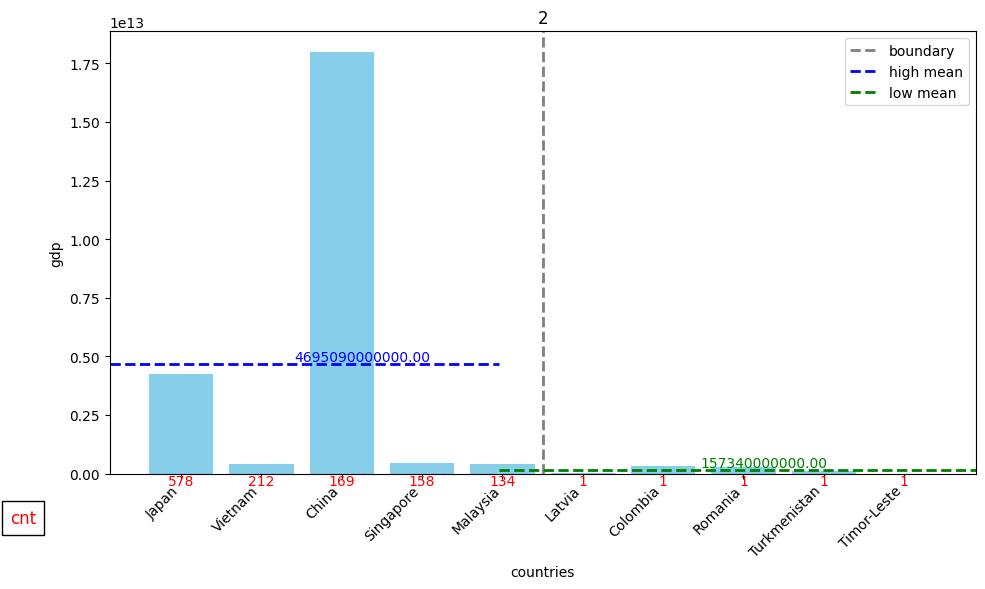

In [ ]:
file_path = '2_new_df1.csv'
df = pd.read_csv(file_path)





# 막대그래프로 시각화
plt.figure(figsize=(10, 6))
bars =plt.bar(df['country_eng_nm'], df['gdp'], color='skyblue')
plt.xlabel('countries')
plt.ylabel('gdp')
plt.title('2')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()

# 가운데에 수직선 추가
boundary = len(df) / 2-0.5
plt.axvline(len(df) / 2 - 0.5, color='gray', linestyle='--', linewidth=2, label='boundary')

# x축의 나라 이름 아래에 'cnt' 변수 값을 표시
for idx, cnt_value in enumerate(df['cnt']):
    plt.text(idx, -0.03, str(cnt_value), ha='center', va='top', color='RED')

# 좌하향 쪽에 'cnt'라는 이름을 박스 안에 추가
plt.annotate('cnt', xy=(-0.1, 0), xytext=(-0.1, -0.1),
             ha='center', va='center', color='red', fontsize=12,
             bbox=dict(boxstyle='square', facecolor='white', edgecolor='black', pad=0.5),
             xycoords='axes fraction', textcoords='axes fraction')




# 왼쪽과 오른쪽 평균값 계산
left_average = df.loc[df.index < boundary, 'gdp'].mean()
right_average = df.loc[df.index >= boundary, 'gdp'].mean()

# 가로선으로 왼쪽과 오른쪽의 평균값 표시
plt.axhline(left_average, xmin=0, xmax=boundary / len(df), color='blue', linestyle='--', linewidth=2, label='high mean')
plt.axhline(right_average, xmin=boundary / len(df), xmax=1, color='green', linestyle='--', linewidth=2, label='low mean')


# 왼쪽과 오른쪽 평균값을 수평선 위에 텍스트로 표시
plt.text(boundary / 2, left_average, f'{left_average:.2f}', ha='center', va='bottom', color='blue')
plt.text(boundary + (len(df) - boundary) / 2, right_average, f'{right_average:.2f}', ha='center', va='bottom', color='green')

plt.legend()  # 범례 표시
plt.tight_layout()

# 그래프 표시
plt.show()

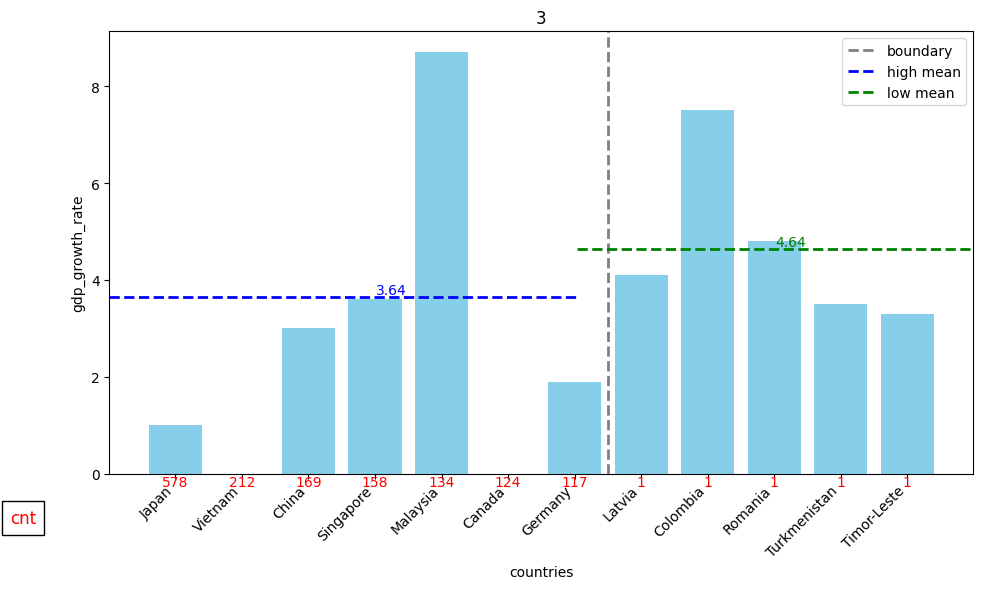

In [ ]:
file_path = '3_new_df1.csv'
df = pd.read_csv(file_path)


# 축약된 형태로 표현할 값 정의
reduced_values = df['gdp_growth_rate']

# 막대그래프로 시각화
plt.figure(figsize=(10, 6))
bars =plt.bar(df['country_eng_nm'], df['gdp_growth_rate'], color='skyblue')
plt.xlabel('countries')
plt.ylabel('gdp_growth_rate')
plt.title('3')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()

# 가운데에 수직선 추가
boundary = len(df) / 2+0.5
plt.axvline(len(df) / 2+0.5, color='gray', linestyle='--', linewidth=2, label='boundary')

# x축의 나라 이름 아래에 'cnt' 변수 값을 표시
for idx, cnt_value in enumerate(df[ 'cnt']):
    plt.text(idx, -0.03, str(cnt_value), ha='center', va='top', color='RED')

# 좌하향 쪽에 'cnt'라는 이름을 박스 안에 추가
plt.annotate('cnt', xy=(-0.1, 0), xytext=(-0.1, -0.1),
             ha='center', va='center', color='red', fontsize=12,
             bbox=dict(boxstyle='square', facecolor='white', edgecolor='black', pad=0.5),
             xycoords='axes fraction', textcoords='axes fraction')

# 왼쪽과 오른쪽 평균값 계산
left_average = df.loc[df.index < boundary, 'gdp_growth_rate'].mean()
right_average = df.loc[df.index >= boundary, 'gdp_growth_rate'].mean()

# 가로선으로 왼쪽과 오른쪽의 평균값 표시
plt.axhline(left_average, xmin=0, xmax=boundary / len(df), color='blue', linestyle='--', linewidth=2, label='high mean')
plt.axhline(right_average, xmin=boundary / len(df), xmax=1, color='green', linestyle='--', linewidth=2, label='low mean')


# 왼쪽과 오른쪽 평균값을 수평선 위에 텍스트로 표시
plt.text(boundary / 2, left_average, f'{left_average:.2f}', ha='center', va='bottom', color='blue')
plt.text(boundary + (len(df) - boundary) / 2, right_average, f'{right_average:.2f}', ha='center', va='bottom', color='green')

plt.legend()  # 범례 표시
plt.tight_layout()

# 그래프 표시
plt.show()

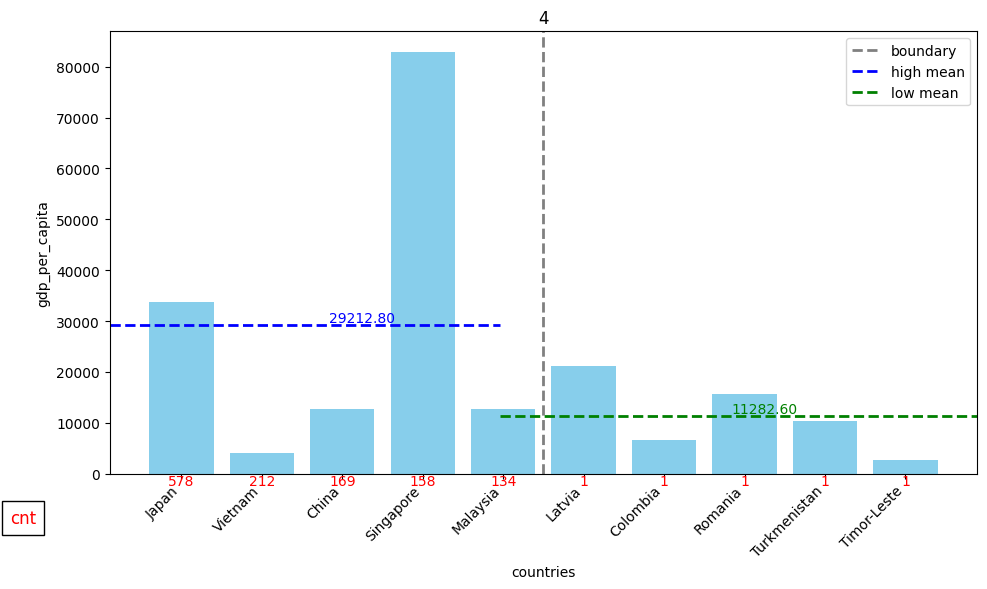

In [ ]:
file_path = '4_new_df1.csv'
df = pd.read_csv(file_path)


# 축약된 형태로 표현할 값 정의
reduced_values = df['gdp_per_capita']

# 막대그래프로 시각화
plt.figure(figsize=(10, 6))
bars =plt.bar(df['country_eng_nm'], df['gdp_per_capita'], color='skyblue')
plt.xlabel('countries')
plt.ylabel('gdp_per_capita')
plt.title('4')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()

# 가운데에 수직선 추가
boundary = len(df) / 2 - 0.5
plt.axvline(len(df) / 2-0.5, color='gray', linestyle='--', linewidth=2, label='boundary')

# x축의 나라 이름 아래에 'cnt' 변수 값을 표시
for idx, cnt_value in enumerate(df[ 'cnt']):
    plt.text(idx, -0.03, str(cnt_value), ha='center', va='top', color='RED')

# 좌하향 쪽에 'cnt'라는 이름을 박스 안에 추가
plt.annotate('cnt', xy=(-0.1, 0), xytext=(-0.1, -0.1),
             ha='center', va='center', color='red', fontsize=12,
             bbox=dict(boxstyle='square', facecolor='white', edgecolor='black', pad=0.5),
             xycoords='axes fraction', textcoords='axes fraction')


# 왼쪽과 오른쪽 평균값 계산
left_average = df.loc[df.index < boundary, 'gdp_per_capita'].mean()
right_average = df.loc[df.index >= boundary, 'gdp_per_capita'].mean()

# 가로선으로 왼쪽과 오른쪽의 평균값 표시
plt.axhline(left_average, xmin=0, xmax=boundary / len(df), color='blue', linestyle='--', linewidth=2, label='high mean')
plt.axhline(right_average, xmin=boundary / len(df), xmax=1, color='green', linestyle='--', linewidth=2, label='low mean')


# 왼쪽과 오른쪽 평균값을 수평선 위에 텍스트로 표시
plt.text(boundary / 2, left_average, f'{left_average:.2f}', ha='center', va='bottom', color='blue')
plt.text(boundary + (len(df) - boundary) / 2, right_average, f'{right_average:.2f}', ha='center', va='bottom', color='green')

plt.legend()  # 범례 표시
plt.tight_layout()

# 그래프 표시
plt.show()

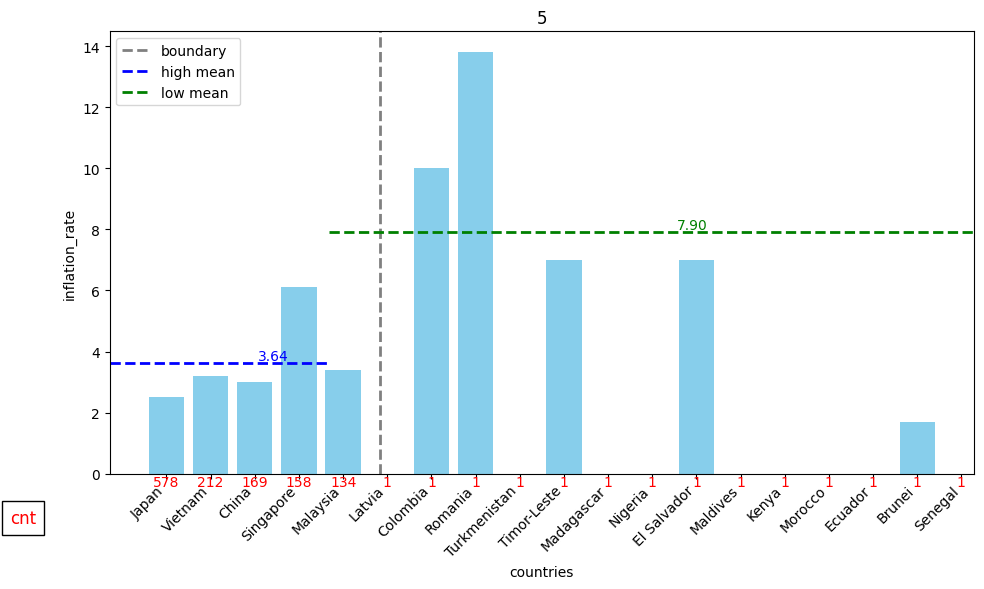

In [ ]:
file_path = '5_new_df1.csv'
df = pd.read_csv(file_path)


# 축약된 형태로 표현할 값 정의
reduced_values = df['inflation_rate']

# 막대그래프로 시각화
plt.figure(figsize=(10, 6))
bars =plt.bar(df['country_eng_nm'], df['inflation_rate'], color='skyblue')
plt.xlabel('countries')
plt.ylabel('inflation_rate')
plt.title('5')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()

# 가운데에 수직선 추가
boundary = len(df) / 3-1.5
plt.axvline(len(df) / 3-1.5, color='gray', linestyle='--', linewidth=2, label='boundary')

# x축의 나라 이름 아래에 'cnt' 변수 값을 표시
for idx, cnt_value in enumerate(df[ 'cnt']):
    plt.text(idx, -0.03, str(cnt_value), ha='center', va='top', color='RED')

# 좌하향 쪽에 'cnt'라는 이름을 박스 안에 추가
plt.annotate('cnt', xy=(-0.1, 0), xytext=(-0.1, -0.1),
             ha='center', va='center', color='red', fontsize=12,
             bbox=dict(boxstyle='square', facecolor='white', edgecolor='black', pad=0.5),
             xycoords='axes fraction', textcoords='axes fraction')


# 왼쪽과 오른쪽 평균값 계산
left_average = df.loc[df.index < boundary, 'inflation_rate'].mean()
right_average = df.loc[df.index >= boundary, 'inflation_rate'].mean()

# 가로선으로 왼쪽과 오른쪽의 평균값 표시
plt.axhline(left_average, xmin=0, xmax=boundary / len(df), color='blue', linestyle='--', linewidth=2, label='high mean')
plt.axhline(right_average, xmin=boundary / len(df), xmax=1, color='green', linestyle='--', linewidth=2, label='low mean')


# 왼쪽과 오른쪽 평균값을 수평선 위에 텍스트로 표시
plt.text(boundary / 2, left_average, f'{left_average:.2f}', ha='center', va='bottom', color='blue')
plt.text(boundary + (len(df) - boundary) / 2, right_average, f'{right_average:.2f}', ha='center', va='bottom', color='green')


plt.legend()  # 범례 표시
plt.tight_layout()

# 그래프 표시
plt.show()

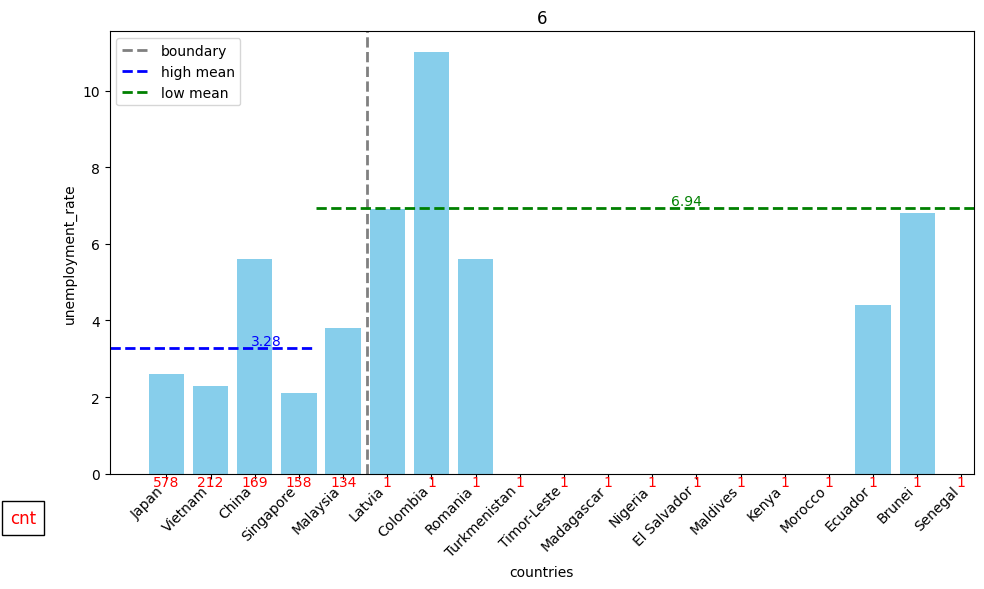

In [ ]:
file_path = '6_new_df1.csv'
df = pd.read_csv(file_path)


# 축약된 형태로 표현할 값 정의
reduced_values = df['unemployment_rate']

# 막대그래프로 시각화
plt.figure(figsize=(10, 6))
bars =plt.bar(df['country_eng_nm'], df['unemployment_rate'], color='skyblue')
plt.xlabel('countries')
plt.ylabel('unemployment_rate')
plt.title('6')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()

# 가운데에 수직선 추가
boundary = len(df) / 3-1.8
plt.axvline(len(df) / 3-1.8, color='gray', linestyle='--', linewidth=2, label='boundary')

# x축의 나라 이름 아래에 'cnt' 변수 값을 표시
for idx, cnt_value in enumerate(df[ 'cnt']):
    plt.text(idx, -0.03, str(cnt_value), ha='center', va='top', color='RED')

# 좌하향 쪽에 'cnt'라는 이름을 박스 안에 추가
plt.annotate('cnt', xy=(-0.1, 0), xytext=(-0.1, -0.1),
             ha='center', va='center', color='red', fontsize=12,
             bbox=dict(boxstyle='square', facecolor='white', edgecolor='black', pad=0.5),
             xycoords='axes fraction', textcoords='axes fraction')

# 왼쪽과 오른쪽 평균값 계산
left_average = df.loc[df.index < boundary, 'unemployment_rate'].mean()
right_average = df.loc[df.index >= boundary, 'unemployment_rate'].mean()

# 가로선으로 왼쪽과 오른쪽의 평균값 표시
plt.axhline(left_average, xmin=0, xmax=boundary / len(df), color='blue', linestyle='--', linewidth=2, label='high mean')
plt.axhline(right_average, xmin=boundary / len(df), xmax=1, color='green', linestyle='--', linewidth=2, label='low mean')


# 왼쪽과 오른쪽 평균값을 수평선 위에 텍스트로 표시
plt.text(boundary / 2, left_average, f'{left_average:.2f}', ha='center', va='bottom', color='blue')
plt.text(boundary + (len(df) - boundary) / 2, right_average, f'{right_average:.2f}', ha='center', va='bottom', color='green')

plt.legend()  # 범례 표시
plt.tight_layout()

# 그래프 표시
plt.show()